# Statsmodels for Statistical Modeling

## Preparation

- Download and Install [Anaconda](https://www.continuum.io/downloads) (Python 3 version)
- Run command in a new shell: `jupyter lab`
- If you run jupyter lab in a linux server through ssh, open a new terminal
    - `ssh -L 8000:localhost:(jupyter port, default is 8888) (user)@(server address)`
    - after log in, `jupyter notebook list`, check and copy the token of your jupyter
    - open browser http://localhost:8000/, enter the token
- Create a new notebook: Left-upper area -> "+" (New launcher) -> Notebook -> Python 3

## What is Statsmodels

- A Python module that allows users to 
    - explore data
    - estimate statistical models
    - perform statistical tests
    
Reference: [Statsmodels official site](http://statsmodels.sourceforge.net/)

## Contents

1. Linear Regression
    - Theory
    - Formula Form and Matrix Form
    - Regression Plot
2. Extension of Linear Regression Terms
    - Categorical X and ANOVA
    - Transformation and Interaction
3. Generalized Linear Model

## Statsmodels (0.1) Prepare Data

In [1]:
# Load modules and set options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('precision', 3)

In [2]:
da = pd.read_csv("Diamonds.csv", index_col="n")
print(da.shape)
da.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
n,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [3]:
# Drop NA values
dac = da.dropna()
dac.shape

(39708, 10)

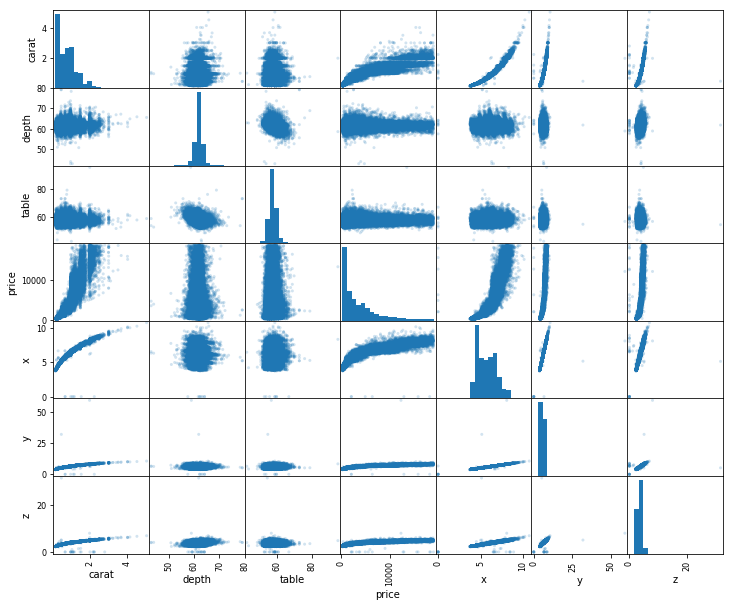

In [4]:
# Bivariate Association
_ = pd.plotting.scatter_matrix(da, alpha=0.2, hist_kwds={"bins": 20}, figsize=(12, 10))

## Statsmodels (1.1.1): Linear Regression Theory


- Goal: We aim to study the relationship between a dependent variable $y$ and $p$ indepedent variables $x_1, x_2,\cdots, x_p$.

- Model of Linear Regression: $y = \beta_0 + x_1\beta_1 + x_2\beta_2 + \cdots + x_p\beta_p + \varepsilon$

- Components:
    - $\beta_0$: intercept of $y$ when $x_1, x_2,\cdots, x_p$ are all 0
    - $\beta_j$: slope of $x_j$ on $y$, $j = 1, 2, \cdots, p$
    - $\varepsilon$: random error of $y$ in each observation
    
- Prediction: To predict $y_i$, if we know $\hat{\beta} = (\hat{\beta}_0, \hat{\beta}_1, \cdots, \hat{\beta}_p)^T$ and $x_i = (1, x_{i1}, x_{i2}, \cdots, x_{ip})$ from data, we can predict $y_i$ with $\hat{y}_i = x_i\hat{\beta} = \hat{\beta}_0 + x_{i1}\hat{\beta}_1 + \cdots + x_{ip}\hat{\beta}_p$

- Method: To solve $\hat{\beta}$, we can use ordinary least squares (OLS): $\min_{\beta}\sum_i^n(y_i - x_i\beta)^2$, when iid normal assumption of random error $\varepsilon_i \sim^{iid} N(0,\sigma^2),\quad \sigma^2 > 0$ is satisfied.

## Statsmodels (1.1.2): Linear Regression (Formula-Form)

In [5]:
import statsmodels.formula.api as smf
model_lm1 = smf.ols("price ~ carat + depth", data=da).fit()
print(model_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.154e+05
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:14:02   Log-Likelihood:            -3.4751e+05
No. Observations:               39708   AIC:                         6.950e+05
Df Residuals:                   39705   BIC:                         6.950e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4046.2863    329.513     12.280      0.0

## Statsmodels (1.2.1): Linear Regression (Matrix-Form)

- If we have $n$ observations, we can write $y = \beta_0 + x_1\beta_1 + x_2\beta_2 + \cdots x_p\beta_p + \varepsilon$ into:
- Matrix Form of Linear Regression: $Y = X\beta + \varepsilon$.
    - row $i$ is $i$th observation, column $j$ is $j$th variable
    - $Y_{n\times1} = (y_1, y_2, \cdots, y_n)^T$, 
    - $\varepsilon_{n\times1} = (\varepsilon_1, \varepsilon_2, \cdots, \varepsilon_n)^T$, $\varepsilon_i \sim^{iid} N(0,\sigma^2),\quad \sigma^2 > 0$
    - $X_{n\times(p+1)} = (1, X_1, X_2, \cdots, X_p)$, For each variable $X_j = (X_{1j}, X_{2j}, \cdots, X_{nj})^T$
    - $\beta_{(p+1)\times1} = (\beta_0, \beta_1, \beta_2, \cdots, \beta_p)^T$  
- Prediction in Matrix Form: $\hat{Y} = X\hat{\beta}$
- Method (OLS) in Matrix Form: solution $\hat{\beta} = (X^TX)^{-1}X^TY$ which $\min_{\beta}(Y - X\beta)^T(Y - X\beta)$, when iid normal assumption of $\varepsilon$ is satisfied.
- If we want to use matrix-form model, we should prepare our numeric matrix X and Y before building model
- More general in machine learning field

## Statsmodels (1.2.2): Linear Regression (Matrix-Form)

In [6]:
import statsmodels.api as sm
X = dac[["carat", "depth"]].assign(intercept = 1)
Y = dac["price"]
model_lm2 = sm.OLS(Y, X).fit()
print(model_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.154e+05
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:14:02   Log-Likelihood:            -3.4751e+05
No. Observations:               39708   AIC:                         6.950e+05
Df Residuals:                   39705   BIC:                         6.950e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       7779.7895     16.192    480.475      0.0

/Users/fangda/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## How to get help

- From Function Help: ? + function
    - ?sm.OLS
    - ?model_lm2.summary
- From Autofill with *Tab*:
    - sm. + *Tab*
    - model_lm2. + *Tab*
- From Google: Your Question (what you want to do) + statsmodels
    - test statsmodels
    - mixed effect model statsmodels
- From Official Website: http://statsmodels.sourceforge.net/

## Statsmodels (1.3.1): Regression Plot

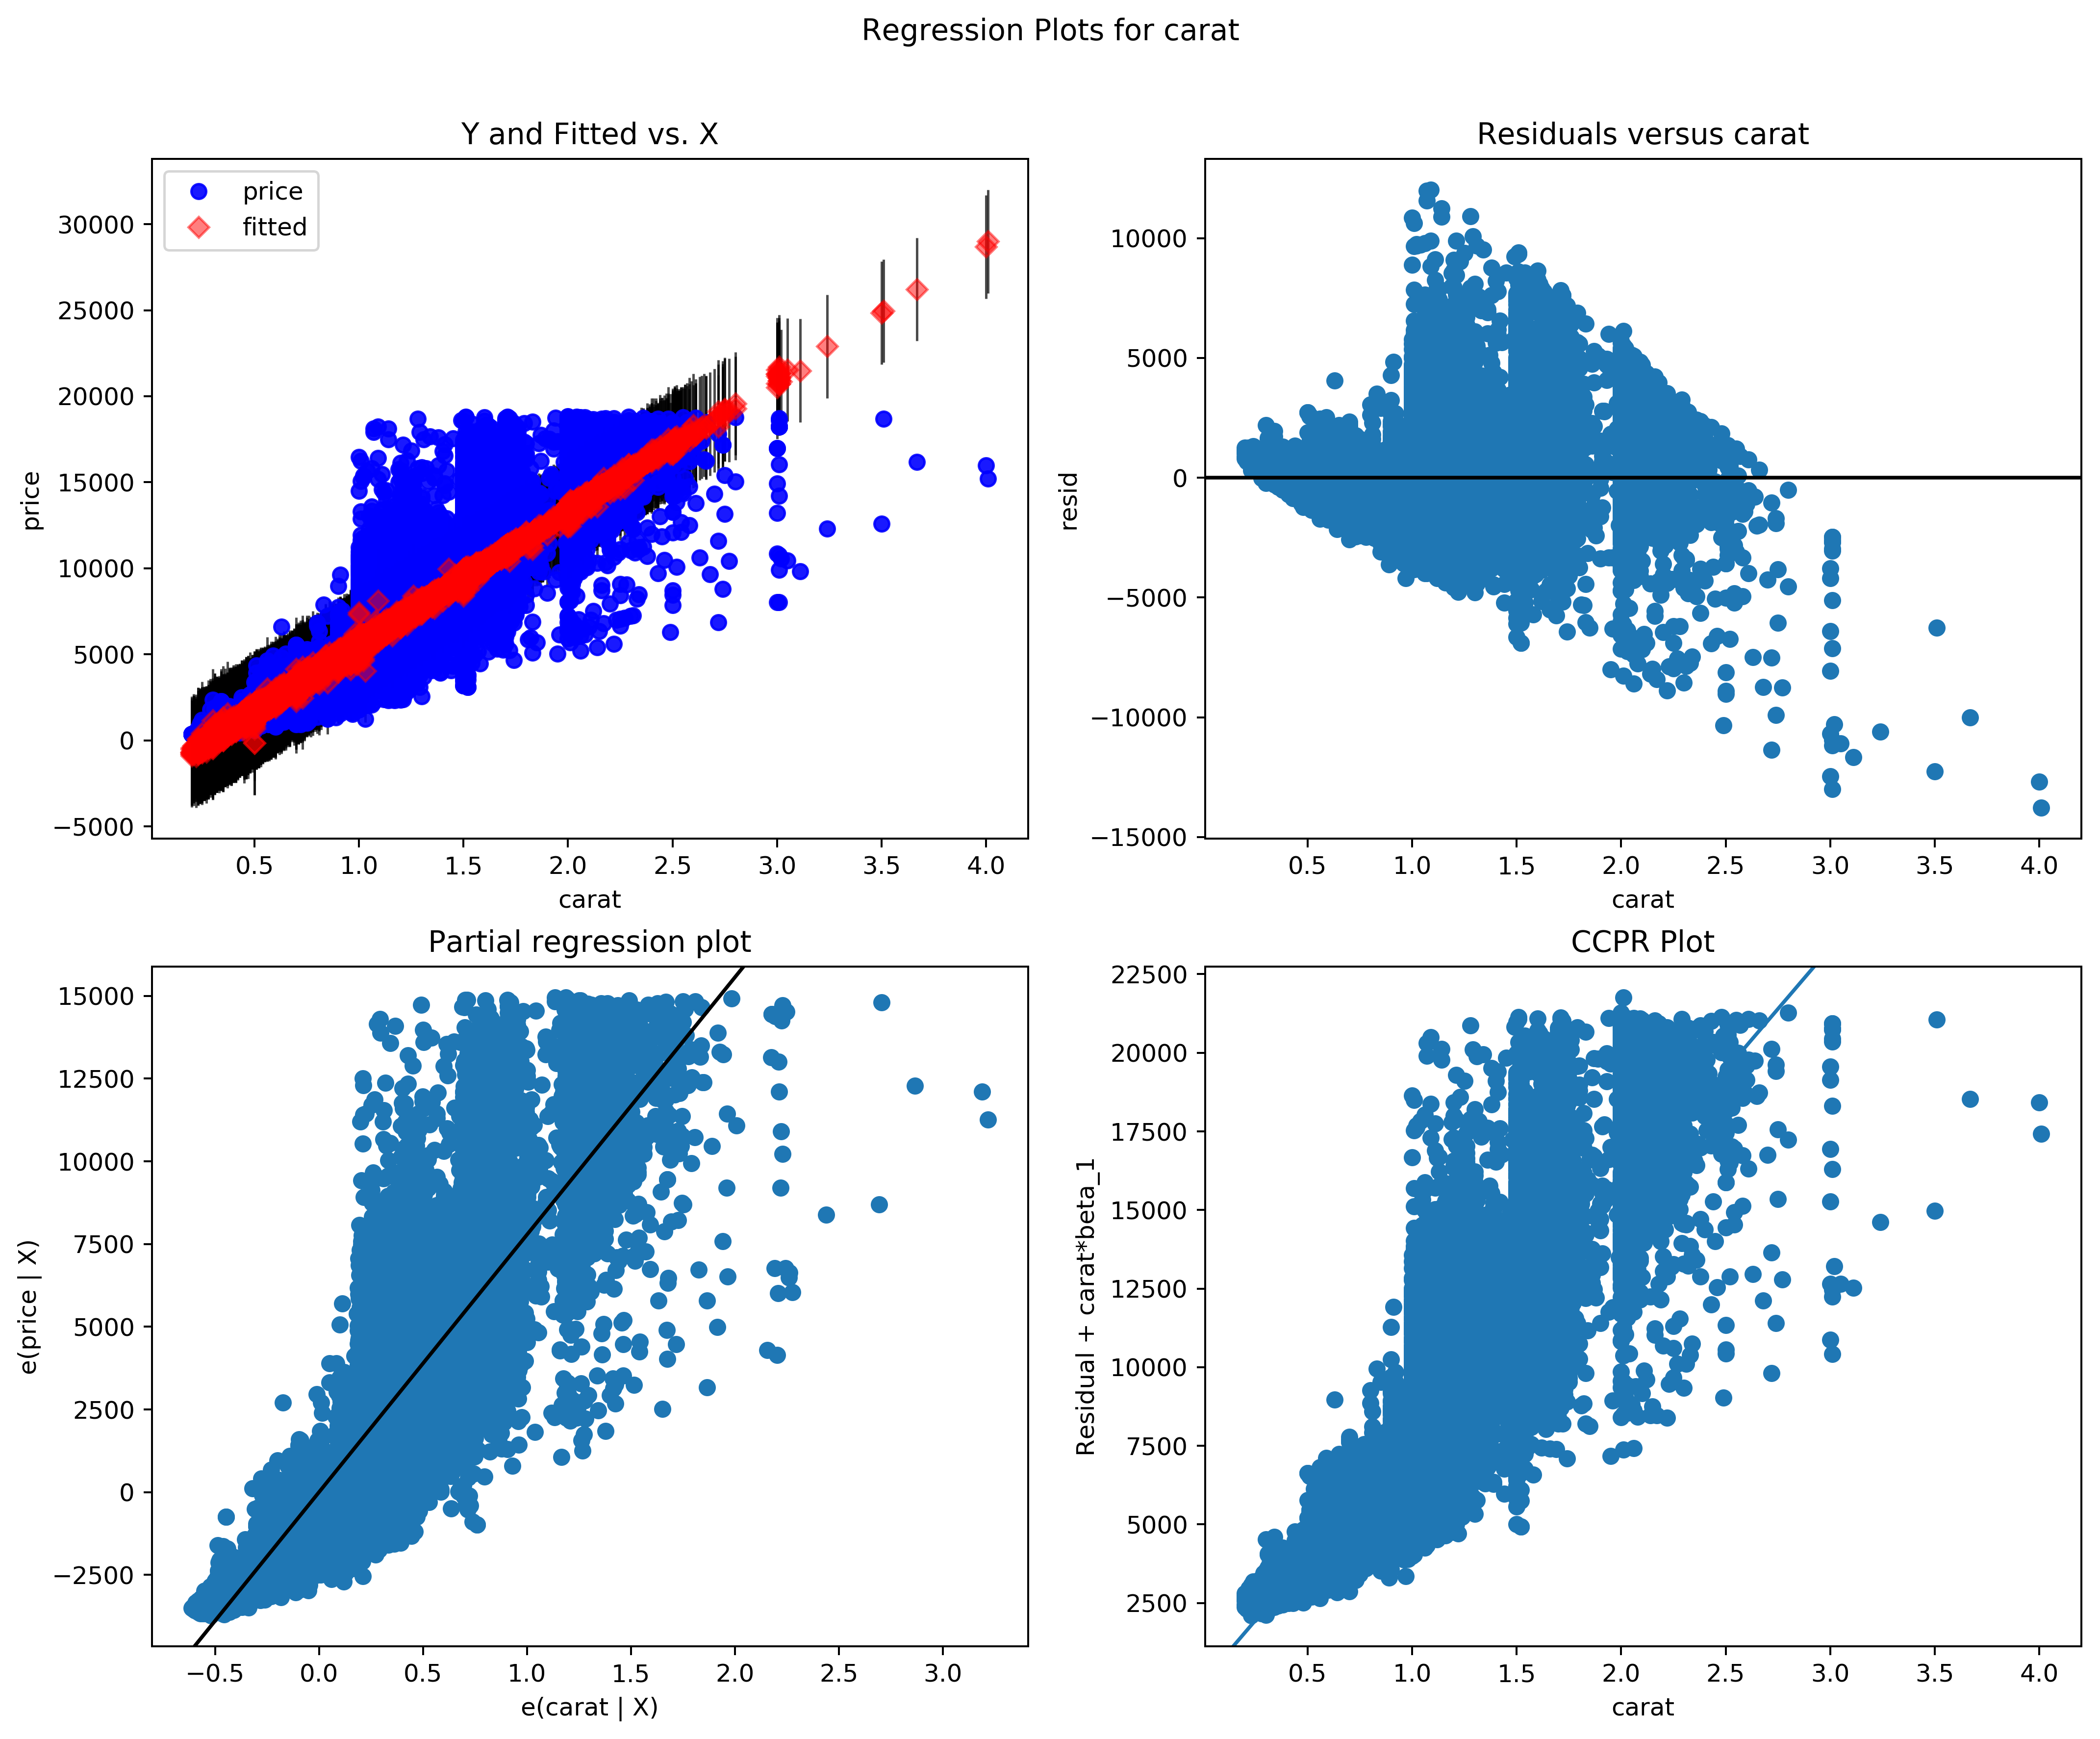

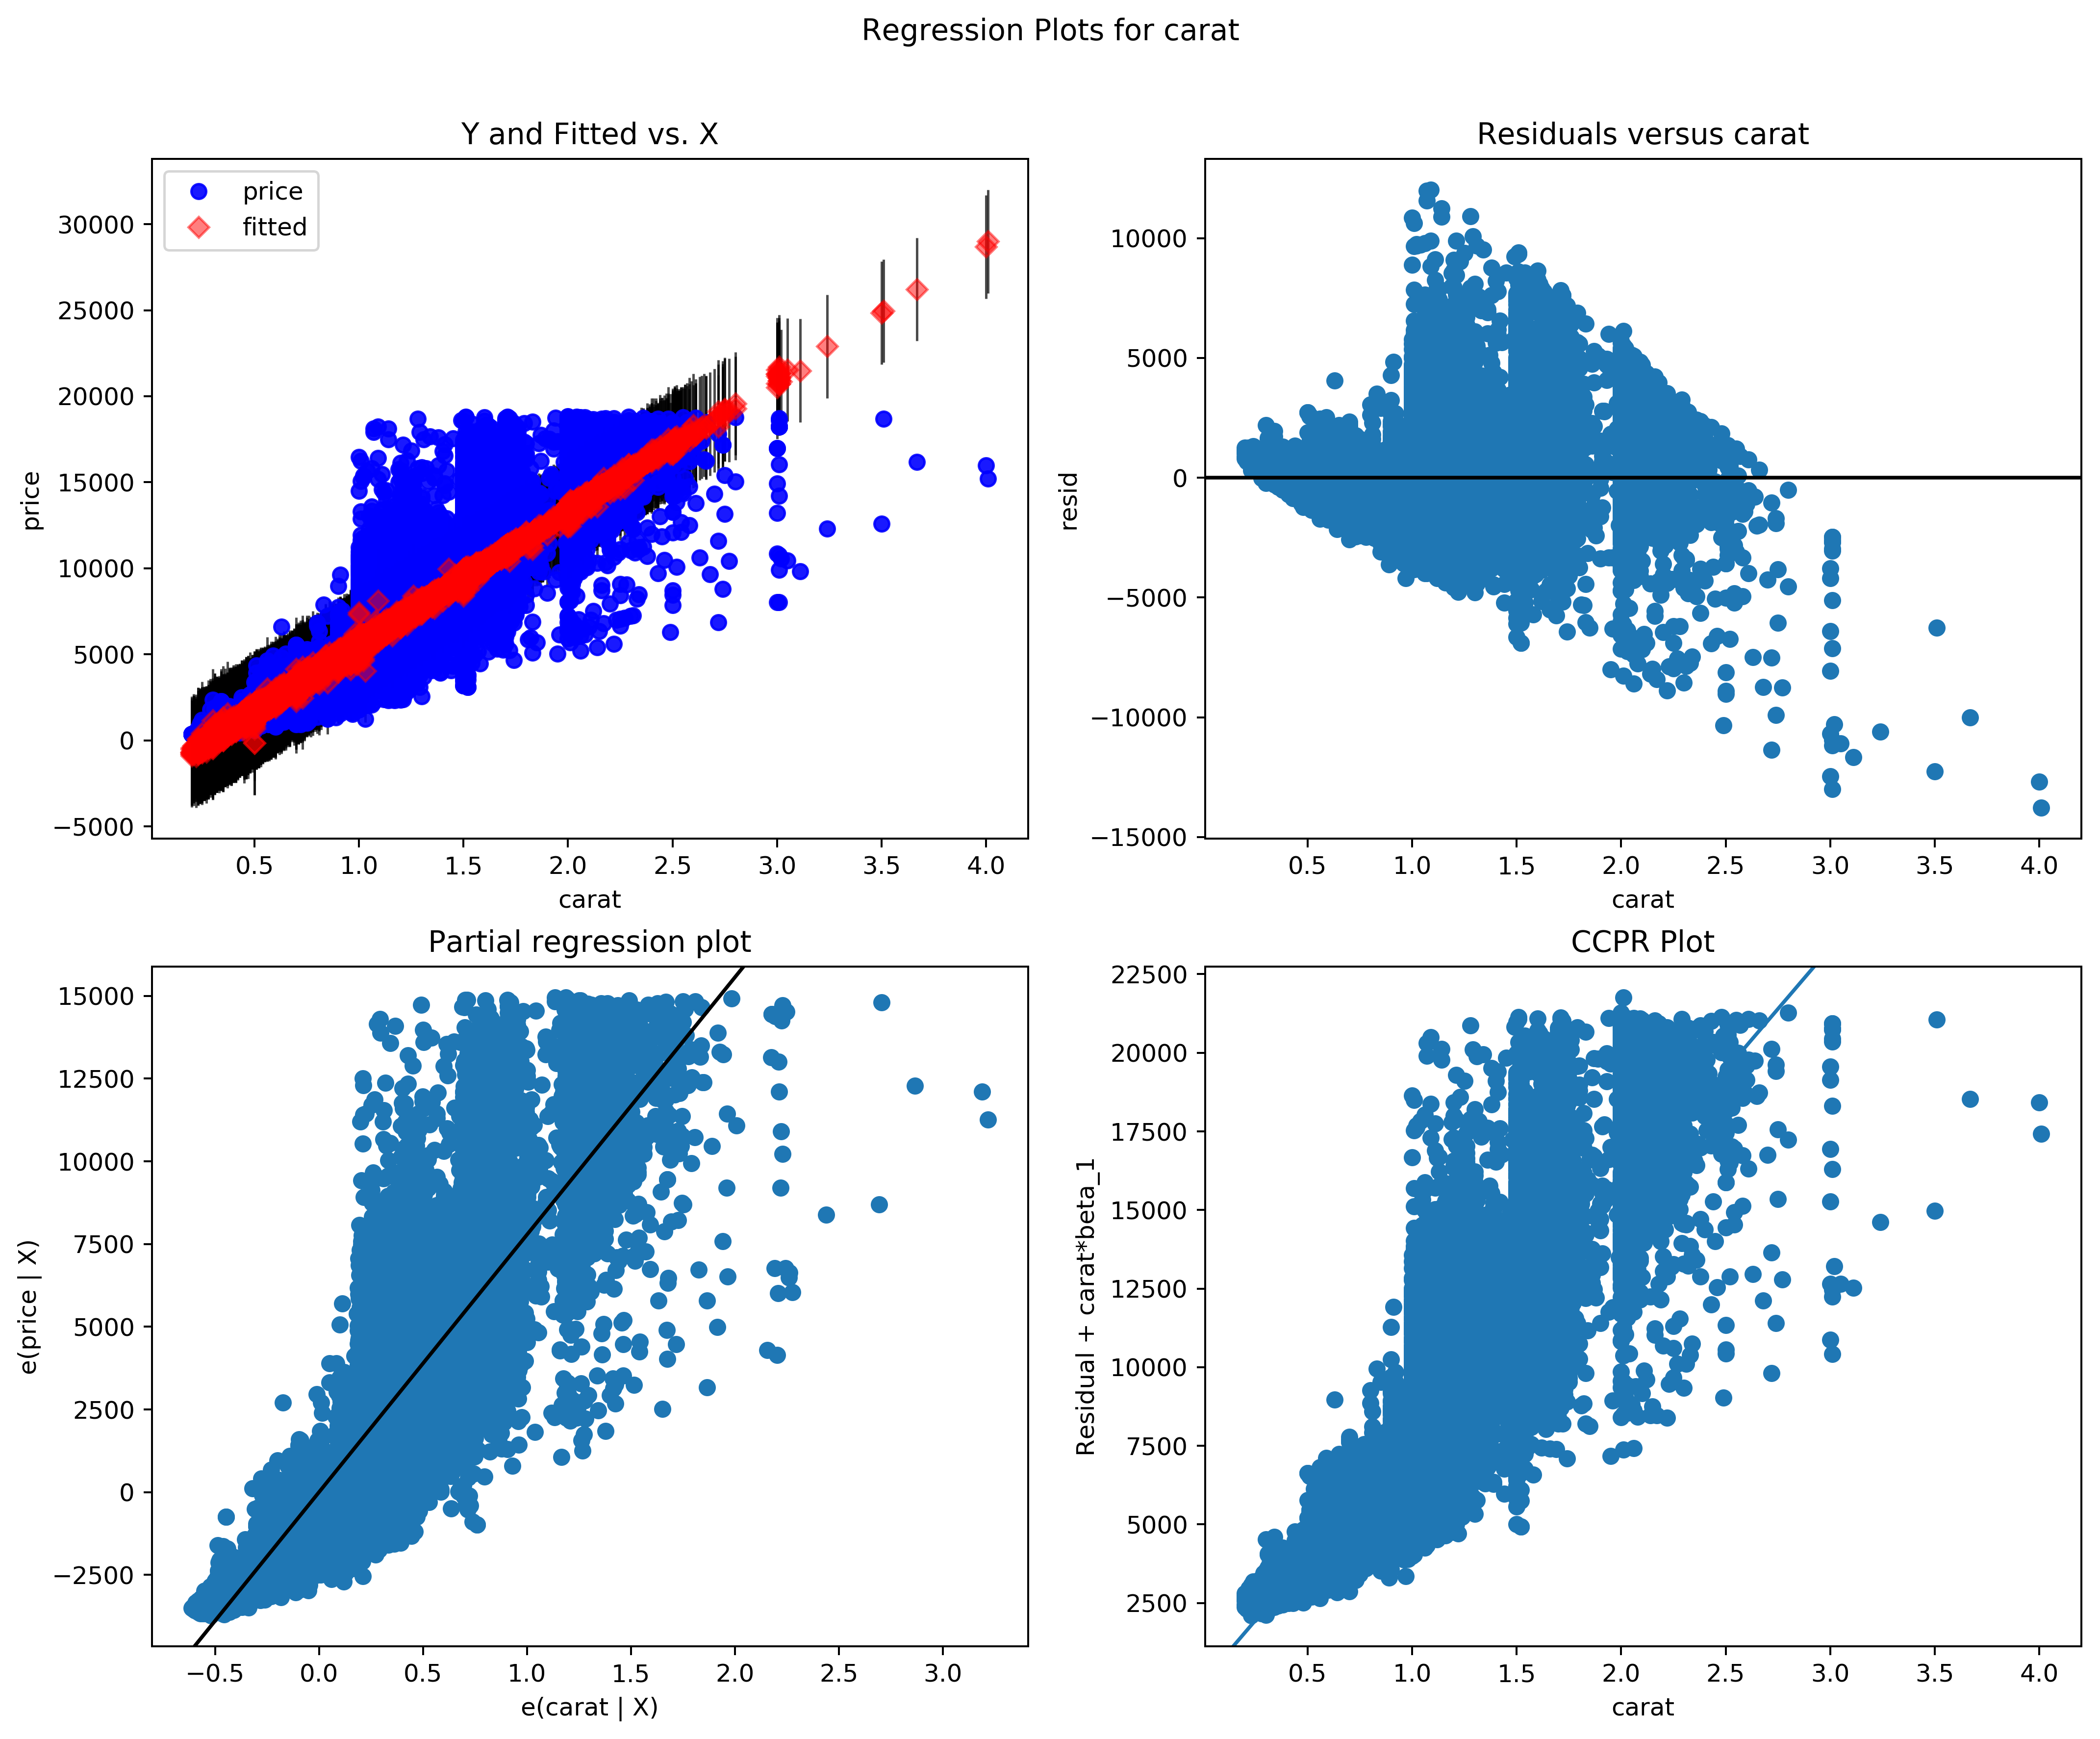

In [7]:
fig = plt.figure(figsize=(12, 10), dpi=360)
sm.graphics.plot_regress_exog(model_lm1, "carat", fig=fig)

## Statsmodels (1.3.2): Residual Plot
- Goal: whether residuals $\hat{\varepsilon} = Y - \hat{Y}$ satisfy normal distribution
- A straight line indicates normal distribution of residuals

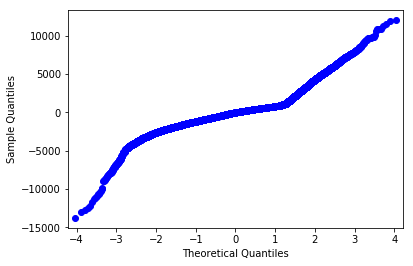

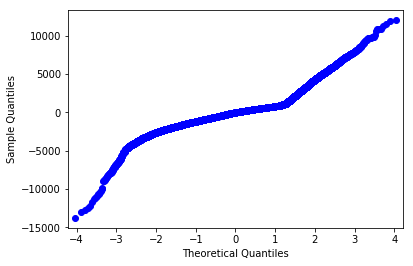

In [8]:
sm.graphics.qqplot(model_lm1.resid)

## Statsmodels (2.1.1): Linear Regression with Categorical X

- $y = \beta_0 + x\beta + \varepsilon$
- If $x$ is a categorical variable, e.g. $x$ take values from group 1, group 2, group 3, ..., group $K$
- Group order may not have linear relationship with Y
- Instead of using one variable, we break categorical x into $K-1$ variables (called dummy variable): 
    - $x_1$: whether $x$ is in group 1, if yes $x_1 = 1$, otherwise $x_1 = 0$
    - $x_2$: whether $x$ is in group 2, if yes $x_2 = 1$, otherwise $x_2 = 0$
    - ...
    - $x_{K-1}$: whether $x$ is in group $K-1$, if yes $x_{K-1} = 1$, otherwise $X_{K-1} = 0$
    - We needn't ask for $x_K$, if $x$ is in $x_1, \cdots, x_{K-1}$, $x$ cannot be in group $K$, vice versa.
- As a result, we write $y = \beta_0 + x_1\beta_1 + x_2\beta_2 + \cdots + x_{K-1}\beta_{K-1} + \varepsilon$, the same form as linear regression.

## Statsmodels (2.1.2): Linear Regression with Categorical X

In [9]:
model_lm3 = smf.ols("price ~ cut + color", data = dac).fit()
print(model_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     173.3
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:14:30   Log-Likelihood:            -3.8476e+05
No. Observations:               39708   AIC:                         7.695e+05
Df Residuals:                   39697   BIC:                         7.696e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3535.7630    125.071  

## Statsmodels (2.1.3): ANOVA with Categorical X

In [10]:
sm.stats.anova_lm(model_lm3)

/Users/fangda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/fangda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/fangda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
cut,4.0,8.268e+09,2.067e+09,135.293,5.106e-115
color,6.0,1.821e+10,3.035e+09,198.613,1.833e-250
Residual,39697.0,6.065e+11,1.528e+07,NaN,NaN


## Statsmodels (2.2.1): Linear Regression with Transformation and Interaction

- Model of Linear Regression: $y = x\beta + \varepsilon = \beta_0 + x_1\beta_1 + x_2\beta_2 + \cdots + x_p\beta_p + \varepsilon$
- If the relationship between $y$ and $x$ is not exactly linear:
    - Add or delete variables:
        - +: add a variable 
        - -: delete a variable
        - 1: intercept term (-1: remove intercept)
    - Higher polynomial terms of $x$: $x^2, x^3, \cdots$
        - I(x \*\* 2), I(x \*\* 3), ....
    - Interaction between $x$:
        - $x_1$:$x_2$: only interaction effects between $x_1$ and $x_2$
        - $x_1$\*$x_2$: both main effects and interaction effects
        - ($x_1$+$x_2$+...)\*\*k: to formulate $k$th interaction between $x_1$, $x_2$, ...
    - Transformation of $x$ or $y$: $\log(x), x^a, 1\{x > c\}, \cdots$
        - Transformation without operator +, -, \*, / or \*\*: use function on variable in formula directly
        - Transformation with operator +, -, \*, / or \*\*: use I( ) outside the transformation to indicate it

## Statsmodels (2.2.2): Transformation and Interaction Terms

In [11]:
model_lm4 = smf.ols("np.log(price) ~ np.log(carat) + depth * table + I(depth ** 2)", data = dac).fit()
print(model_lm4.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.174e+05
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:14:30   Log-Likelihood:                -2132.6
No. Observations:               39708   AIC:                             4277.
Df Residuals:                   39702   BIC:                             4329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0096      1.422      7.742

## Statsmodels (2.2.3): Formula Transformation to Matrix Form

In [12]:
import patsy as ps
X = ps.dmatrix(" ~ np.log(carat) + depth * table + I(depth ** 2)", data = dac, return_type = "dataframe")
model_lm5 = sm.OLS(Y, X).fit()
print(model_lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 2.244e+04
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:14:30   Log-Likelihood:            -3.5897e+05
No. Observations:               39708   AIC:                         7.179e+05
Df Residuals:                   39702   BIC:                         7.180e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.335e+04   1.14e+04     -3.813

## Statsmodels (3.1): Generalized Linear Model Theory

- If $\varepsilon$ are not iid normal distributed, e.g. Y has 0, 1 binary values
- Generalized Linear Model: $g(E(Y)) = X\beta$
    - $E(Y)$: conditional expectation of $Y$ given $X$
    - $g(\cdot)$: link function
        - Related with $Q(\theta)$ in (canonical form) exponential family distribution $f(y|\theta) = A(y)\cdot B(\theta)\cdot e^{yQ(\theta)}$
        - $g(y) = y$: Linear regression with normal distribution
        - $g(y) = \log(\frac{y}{1-y})$: Logistic regression with binomial distribution
        - $g(y) = \log(y)$: Poission regression with Poission distribution
    - $X\beta$: linear component, same as linear regression
- Prediction: $\hat{Y} = g^{-1}(X\hat{\beta})$
- Method: To solve $\hat{\beta}$, use maximum likelihood estimator (MLE): $\max_{\beta}\prod_{i=1}^nf(y_i|\theta = \hat{y}_i) = \max_{\beta}\sum_{i=1}^n\log f(y_i|g^{-1}(X_i\beta))$

## Statsmodels (3.2): Generalized Linear Model

In [13]:
Y = (dac["price"] > 10000).astype("int8")
pd.value_counts(Y)

0    35881
1     3827
Name: price, dtype: int64

In [14]:
model_glm = sm.GLM(Y, X, family=sm.families.Binomial()).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                39708
Model:                            GLM   Df Residuals:                    39702
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4196.6
Date:                Mon, 23 Apr 2018   Deviance:                       8393.3
Time:                        15:14:30   Pearson chi2:                 1.94e+04
No. Iterations:                     9                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -340.0505     54.556     -6.233      0.000    -446.979    -233.122
np.log(carat)    10.0100      0.162     61.

## Statsmodels (4): Linear Mixed Model

- Linear Mixed Model: $Y = X\beta + Z\gamma + \varepsilon$
    - $\beta$: fixed effects
    - $\gamma$: random effects, with $Var(\gamma) = G$
    - $Var(Y) = ZGZ^T + \sigma^2 I$
- Prediction: $\hat{Y} = X\hat{\beta}$
- Method: To solve $\hat{\beta}$ and $\hat{G}$, use restricted maximum likelihood estimator (RMLE)

In [28]:
model_lmm = smf.mixedlm("price ~ cut", data=dac, groups=dac["color"]).fit()
print(model_lmm.summary())

               Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    price        
No. Observations:    39708      Method:                REML         
No. Groups:          7          Scale:                 15278528.1336
Min. group size:     2074       Likelihood:            -384756.9091 
Max. group size:     8237       Converged:             Yes          
Mean group size:     5672.6                                         
--------------------------------------------------------------------
                   Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------
Intercept          4448.249  338.873 13.127 0.000  3784.070 5112.428
cut[T.Good]        -345.801  130.736 -2.645 0.008  -602.040  -89.562
cut[T.Ideal]       -789.160  117.557 -6.713 0.000 -1019.567 -558.753
cut[T.Premium]      294.082  119.798  2.455 0.014    59.283  528.881
cut[T.Very Good]   -295.981  120.708 -2.452 0.014 